In [62]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re 
from re import findall
import seaborn as sns

In [5]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [ ]:
print(type(response))
response.content

In [7]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


1. Start by using either the inspector or by viewing the page source. Can you identify a tag that might be helpful for finding the names of all inductees? Make use of this to create a list containing just the names of each inductee.

In [8]:
artists = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
artists

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

In [9]:
len(artists)

9

In [10]:
namelist = []
for names in soup.find_all('h3'):
        namelist.append(names.get_text())
        
    

In [11]:
namelist

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond']

2. Next, try and find a tag that could be used to find the year that each member was inducted. Extract these into a list. When you do this, be sure to only include the year and not the full text. For example, for Roy Acuff, the list entry should be "1962" and not "Inducted 1962". Double-check that the resulting list has the correct number of elements and is in the same order as your inductees list.

In [12]:
year = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})

In [13]:
type(year)

bs4.element.ResultSet

In [14]:
yearlist = []
for row in soup.find_all("div p"):
    yearlist.row
    yearlist.append(int(row.text.strip().replace('Inducted',"")))
yearlist

[]

In [15]:
yearlist

[]

In [16]:
yearlist = [int(row.text.strip().replace('Inducted',""))for row in year]

In [17]:
yearlist

[1962, 2005, 2001, 1966, 1973, 1969, 2005, 2013, 1999]

3. Take the two lists you created on parts 1 and 2 and convert it into a pandas DataFrame.

In [18]:
lists = [namelist, yearlist]
hof_df = pd.concat([pd.Series(x) for x in lists], axis=1)




In [19]:
hof_df

,0,1
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


4. Now, you need to take what you created for the first page and apply it across the rest of the pages so that you can scrape all inductees. Notice that when you click the next page button at the bottom of the page that the url changes to "https://countrymusichalloffame.org/hall-of-fame/members/page/2". Check that the code that you wrote for the first page still works for page 2. Once you have verified that your code will still work, write a for loop that will cycle through all 16 pages and build a DataFrame containing all inductees and the year of their induction.

#Checking if code works for page 2

In [20]:
website_url_two = 'https://countrymusichalloffame.org/hall-of-fame/members/page/2'
response_two = requests.get(website_url_two)
    

In [21]:
soup2 = BeautifulSoup(response_two.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [22]:
artists2 = soup2.find_all('div', attrs = {'class': 'vertical-card_content--title'})
artists2

[<div class="vertical-card_content--title">
 <h3>Bobby Braddock</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Harold Bradley</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Jerry Bradley</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Owen Bradley</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Rod Brasfield</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Garth Brooks</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Brooks &amp; Dunn</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Jim Ed Brown</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Jim Ed Brown and the Browns</h3>
 </div>]

In [23]:
namelist = []
for names in soup2.find_all('h3'):
        namelist.append(names.get_text())

In [24]:
namelist

['Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns']

#Loop to scrape all 16 pages

In [ ]:
# original code I came up with, seemed to create an infinite loop
page = 1
namelist2 = []
yearlist2= []

while page != 17:
    url = 'https://countrymusichalloffame.org/hall-of-fame/members/{page}'
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "lxml")
    for names in soup.find_all('h3'):
        namelist2.append(names.get_text())
        for row in soup.find_all("div p"):
            yearlist.row
            yearlist2.append(int(row.text.strip().replace('Inducted',"")))
            page = page + 1

In [56]:
#Andrew's modified code from the walkthrough
all_artists = []
all_years_inducted = []
for page in range(1, 17):
    if page == 1:
        hof_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
    else:
        hof_url = f'https://countrymusichalloffame.org/hall-of-fame/members/page/{page}'
    response = requests.get(hof_url)
    soup = BeautifulSoup(response.content, 'lxml')
    
    artists_page = soup.find_all('h3')
    artist_list_page = [artist.text for artist in artists_page]
    
    years_inducted_page = soup.find_all('p')
    years_inducted_list_page = [int(re.findall('\d+', year_str.text)[0]) for year_str in years_inducted_page
                               if re.match('\s+Inducted\s\d+\s+', year_str.text)]
    
    all_artists.extend(artist_list_page)
    all_years_inducted.extend(years_inducted_list_page)
    

In [59]:
lists_2 = [all_artists, all_years_inducted]
hof_df_all = pd.concat([pd.Series(x) for x in lists_2], axis=1)

In [60]:
hof_df_all

,0,1
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


In [61]:
hof = pd.DataFrame(hof_df_all)
print(hof)

                 0     1
0        Roy Acuff  1962
1          Alabama  2005
2    Bill Anderson  2001
3      Eddy Arnold  1966
4      Chet Atkins  1973
..             ...   ...
135  Hank Williams  1961
136      Bob Wills  1968
137    Mac Wiseman  2014
138  Tammy Wynette  1998
139    Faron Young  2000

[140 rows x 2 columns]


In [63]:
hof.columns = ['artist', 'year_inducted']
hof.head(1)

,artist,year_inducted
0,Roy Acuff,1962


5. Create a visual using the data that you scraped. Prepare a short (<5 minute) presentation.

<AxesSubplot:>

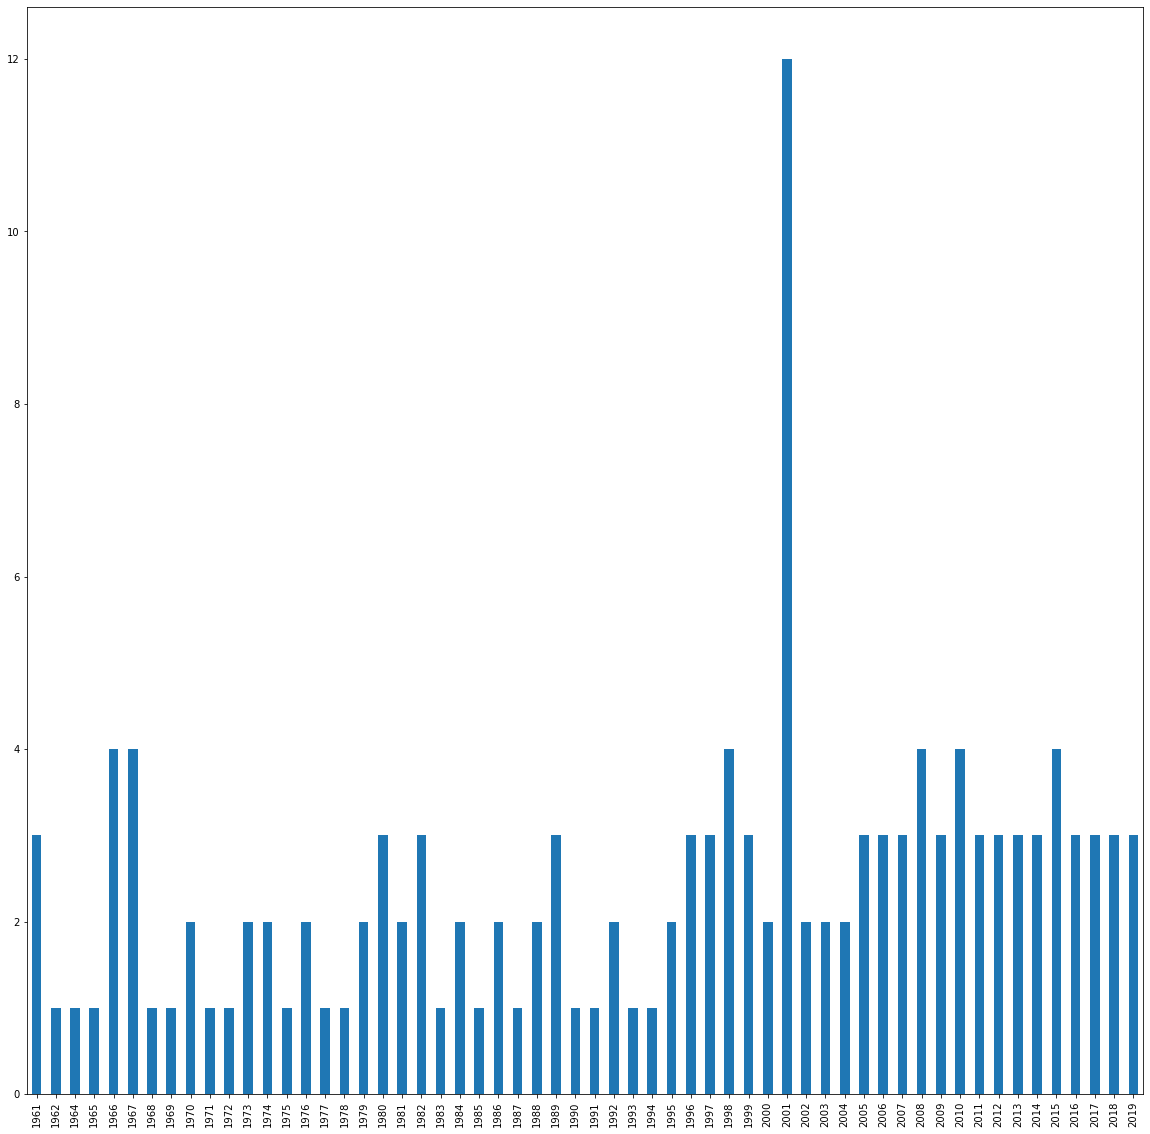

In [86]:
hof.year_inducted.value_counts().sort_index().plot.bar(figsize = (20, 20))
